<a href="https://colab.research.google.com/github/tarunmer77/assignment-NeuralNetwork/blob/main/GasTurbines_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('gas_turbines.csv')
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
data['TEY'].value_counts()

133.74    150
133.78    148
133.67    143
133.76    142
133.79    127
         ... 
162.17      1
144.30      1
107.05      1
169.61      1
143.26      1
Name: TEY, Length: 4207, dtype: int64

In [5]:
for i in data.columns:
  print(data[i].value_counts(),'\n')

19.6760    5
11.5850    5
14.0430    5
25.9690    5
12.0680    5
          ..
24.3220    1
5.8949     1
6.3592     1
7.7117     1
10.2500    1
Name: AT, Length: 12086, dtype: int64 

1011.80    129
1012.10    127
1011.90    121
1010.80    119
1013.60    118
          ... 
997.78       1
986.25       1
996.89       1
996.29       1
1031.00      1
Name: AP, Length: 540, dtype: int64 

100.140    31
100.150    29
100.110    28
100.120    24
100.130    19
           ..
95.180      1
76.509      1
90.342      1
69.158      1
84.000      1
Name: AH, Length: 12637, dtype: int64 

4.5032    7
4.4361    6
4.2500    6
3.8837    6
4.4273    6
         ..
4.0567    1
3.2617    1
3.9554    1
4.5783    1
3.5000    1
Name: AFDP, Length: 11314, dtype: int64 

25.552    9
24.288    9
25.487    9
24.361    9
24.308    9
         ..
23.683    1
37.340    1
26.484    1
29.854    1
18.500    1
Name: GTEP, Length: 8234, dtype: int64 

1100.0    761
1099.9    598
1100.1    592
1100.2    415
1099.8    368
   

In [6]:
data.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


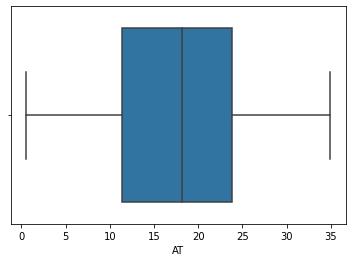

In [7]:
sns.boxplot(data['AT'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


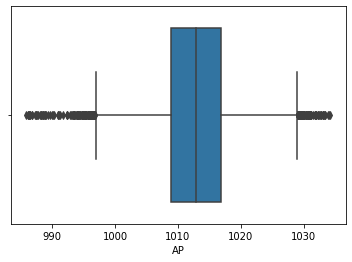

In [8]:
sns.boxplot(data['AP'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


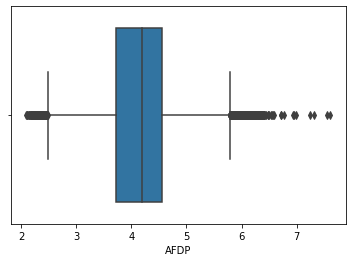

In [9]:
sns.boxplot(data['AFDP'])

In [10]:
data['AFDP']

0        3.5000
1        3.4998
2        3.4824
3        3.4805
4        3.4976
          ...  
15034    3.5421
15035    3.5059
15036    3.4770
15037    3.4486
15038    3.4275
Name: AFDP, Length: 15039, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


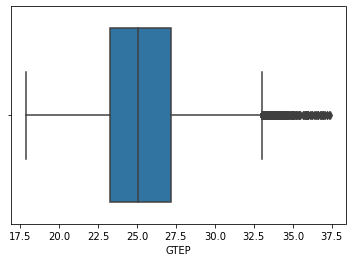

In [11]:
sns.boxplot(data['GTEP'])
data['GTEP']=data['GTEP'].loc[data.GTEP<33]

In [12]:
data=data.dropna(axis=0)
data.shape

(14363, 11)

In [13]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,14363.000000,14363.000000,14363.000000,14363.000000,14363.000000,14363.000000,14363.000000,14363.000000,14363.000000,14363.000000,14363.000000
mean,18.233948,1012.940101,79.013649,4.141225,25.026410,1083.037882,546.333572,132.741320,12.001836,2.032608,68.324963
std,7.391791,6.261948,13.913889,0.712482,3.844529,16.526682,6.696303,14.676335,1.023524,2.253038,10.654177
min,0.522300,985.850000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,12.244500,1008.800000,69.419500,3.694300,22.972000,1076.400000,545.800000,125.385000,11.471000,0.913185,61.167000
50%,18.679000,1012.600000,82.229000,4.159600,24.889000,1088.000000,549.910000,133.760000,11.996000,1.434100,66.707000
75%,24.116500,1016.600000,90.057500,4.492650,26.369000,1094.100000,550.060000,135.320000,12.315000,2.235500,74.290500
max,34.929000,1034.200000,100.200000,7.610600,32.997000,1100.600000,550.610000,167.840000,14.315000,44.103000,119.890000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


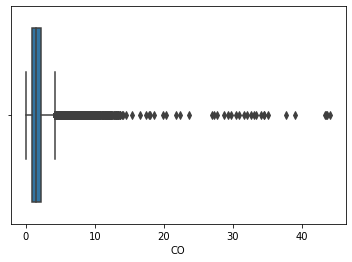

In [14]:
sns.boxplot(data['CO'])

In [15]:
#feature selection using Decision Tree:

In [16]:
from sklearn.tree import DecisionTreeRegressor
dt_model= DecisionTreeRegressor()
x=data.drop('TEY',axis=1)
y=data['TEY']

In [17]:

dt_model.fit(x,y)
l=dt_model.feature_importances_.round(2)>0.001
print(np.where(l==True))

(array([0, 5, 6, 7]),)


In [18]:
new_data=x.iloc[:,[0, 5, 6, 7]]
new_data

,AT,TIT,TAT,CDP
0,6.8594,1059.2,550.00,10.605
1,6.7850,1059.3,550.00,10.598
2,6.8977,1059.4,549.87,10.601
3,7.0569,1059.6,549.99,10.606
4,7.3978,1059.7,549.98,10.612
...,...,...,...,...
15034,9.0301,1049.7,546.21,10.400
15035,7.8879,1046.3,543.22,10.433
15036,7.2647,1037.7,537.32,10.483
15037,7.0060,1043.2,541.24,10.533


In [19]:
# Standardizing

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc= StandardScaler()
x_scaled=sc.fit_transform(new_data)
df= pd.DataFrame(x_scaled, columns=new_data.columns)
df

,AT,TIT,TAT,CDP
0,-1.538862,-1.442438,0.547549,-1.364779
1,-1.548927,-1.436387,0.547549,-1.371619
2,-1.533680,-1.430336,0.528135,-1.368688
3,-1.512142,-1.418234,0.546056,-1.363802
4,-1.466022,-1.412183,0.544562,-1.357940
...,...,...,...,...
14358,-1.245188,-2.017286,-0.018454,-1.565075
14359,-1.399716,-2.223021,-0.464985,-1.532832
14360,-1.484029,-2.743410,-1.346099,-1.483980
14361,-1.519028,-2.410603,-0.760681,-1.435127


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,y,test_size=0.2,random_state=42)

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adadelta,Adam
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import GridSearchCV,KFold,cross_val_score

In [27]:
kfold=KFold(n_splits=10)
def create_model():
    model=Sequential([Dense(12,kernel_initializer='normal',activation='relu'),Dense(8,kernel_initializer='normal',activation='relu'),Dense(1,kernel_initializer='normal')])
    adam=Adam(lr=0.01)
    model.compile(loss='mean_squared_error',optimizer=adam)
    return model

In [28]:
model= create_model()
model_one= model.fit(x_scaled,y,epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
449/449 [==============================] - 1s 2ms/step - loss: 2537.8467
Epoch 2/100
449/449 [==============================] - 1s 1ms/step - loss: 18.2514
Epoch 3/100
449/449 [==============================] - 1s 1ms/step - loss: 4.1286
Epoch 4/100
449/449 [==============================] - 1s 1ms/step - loss: 1.4066
Epoch 5/100
449/449 [==============================] - 1s 1ms/step - loss: 1.0727
Epoch 6/100
449/449 [==============================] - 1s 1ms/step - loss: 0.9257
Epoch 7/100
449/449 [==============================] - 1s 1ms/step - loss: 0.7945
Epoch 8/100
449/449 [==============================] - 1s 1ms/step - loss: 0.7837
Epoch 9/100
449/449 [==============================] - 1s 1ms/step - loss: 0.8276
Epoch 10/100
449/449 [==============================] - 1s 1ms/step - loss: 0.8299
Epoch 11/100
449/449 [==============================] - 1s 1ms/step - loss: 0.8838
Epoch 12/100
449/449 [==============================] - 1s 1ms/step - loss: 0.8588
Epoch 13/

In [29]:
model_one.history.keys()

dict_keys(['loss'])

In [30]:
y_pred=model.predict(x_test)

In [31]:
y_pred=model.predict(x_scaled)

In [32]:
from sklearn.metrics import r2_score

In [33]:
print(r2_score(y_pred,y))

0.9958413102679717


In [34]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'actual value')

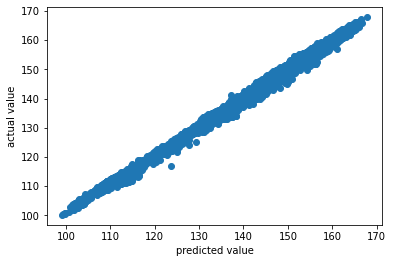

In [35]:
plt.scatter(y_pred, y)
plt.xlabel("predicted value")
plt.ylabel("actual value")

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=7)

In [37]:
model2 = model.fit(np.array(x_train), np.array(y_train), epochs=500)

Epoch 1/500
337/337 [==============================] - 1s 2ms/step - loss: 0.9449
Epoch 2/500
337/337 [==============================] - 1s 2ms/step - loss: 0.9072
Epoch 3/500
337/337 [==============================] - 1s 2ms/step - loss: 0.9463
Epoch 4/500
337/337 [==============================] - 1s 2ms/step - loss: 0.9608
Epoch 5/500
337/337 [==============================] - 1s 2ms/step - loss: 0.8904
Epoch 6/500
337/337 [==============================] - 1s 2ms/step - loss: 0.8205
Epoch 7/500
337/337 [==============================] - 1s 2ms/step - loss: 0.8324
Epoch 8/500
337/337 [==============================] - 1s 2ms/step - loss: 0.8840
Epoch 9/500
337/337 [==============================] - 1s 2ms/step - loss: 0.8294
Epoch 10/500
337/337 [==============================] - 1s 2ms/step - loss: 0.8878
Epoch 11/500
337/337 [==============================] - 1s 2ms/step - loss: 0.8600
Epoch 12/500
337/337 [==============================] - 1s 2ms/step - loss: 0.8856
Epoch 13/500


In [38]:
# training accuracy of base model :

In [39]:
y_train_pred = model.predict(x_train)
print("training accuracy :", r2_score(y_train_pred, y_train))

training accuracy : 0.9975271318075614


In [40]:
# testing accuracy of base model :

In [42]:
y_test_pred = model.predict(x_test)
print("testing accuracy :", r2_score(y_test_pred, y_test))

testing accuracy : 0.997373972691804
